<a href="https://colab.research.google.com/github/nickklos10/fashion-mnist-cnn-classifier/blob/main/Fash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image

In [7]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [8]:
IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [9]:
# Create the training dataset
dataset_train = dsets.FashionMNIST(
    root='./fashion/data',
    train=True,
    transform=composed,
    download=True
)

# Create the validation dataset
dataset_val = dsets.FashionMNIST(
    root='./fashion/data',
    train=False,
    transform=composed,
    download=True
)


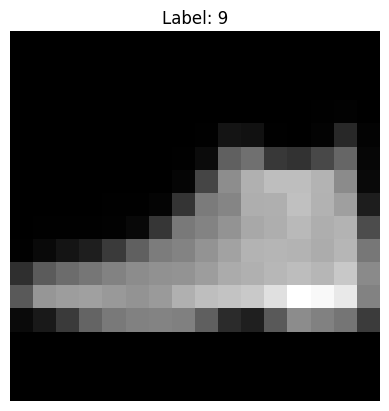

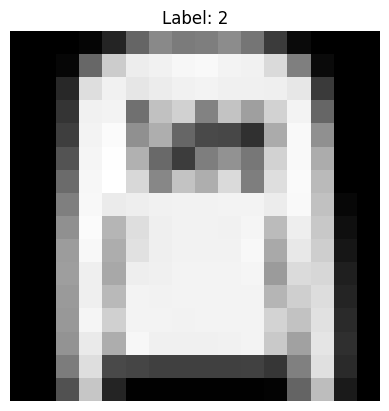

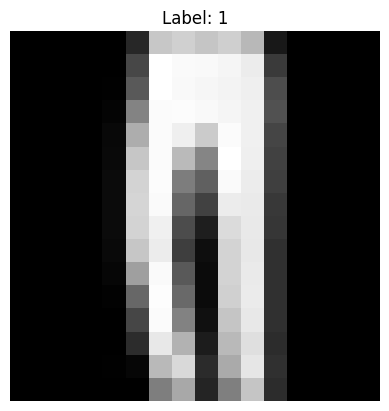

In [10]:
# Function to display a data sample
def show_data(sample):
    image, label = sample
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

for n, data_sample in enumerate(dataset_val):
    show_data(data_sample)
    plt.show()
    if n == 2:
        break


In [15]:
import time
import torch.optim as optim

class CNN(nn.Module):
    # Constructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        return x

In [16]:
# Define the image size (from Question 1)
IMAGE_SIZE = 16

# Define the composed transformations (from Question 1)
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize images to 16x16
    transforms.ToTensor()                        # Convert images to tensor
])

# Create the training dataset
dataset_train = dsets.FashionMNIST(
    root='./fashion/data',    # Directory to store data
    train=True,               # Indicates training data
    transform=composed,       # Apply the composed transformations
    download=True             # Download if not already present
)

# Create the validation dataset
dataset_val = dsets.FashionMNIST(
    root='./fashion/data',    # Directory to store data
    train=False,              # Indicates validation (test) data
    transform=composed,       # Apply the composed transformations
    download=True             # Download if not already present
)

# Create DataLoader objects
BATCH_SIZE = 100

train_loader = DataLoader(dataset=dataset_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=dataset_val, batch_size=BATCH_SIZE, shuffle=False)

In [17]:
# Initialize the CNN model
model = CNN(out_1=16, out_2=32, number_of_classes=10)

# Define the loss function (Cross Entropy Loss)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (SGD with learning rate 0.1)
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [18]:
# Training parameters
n_epochs = 5
cost_list = []
accuracy_list = []

# Record the start time
start_time = time.time()

for epoch in range(n_epochs):
    cost = 0
    model.train()  # Set the model to training mode

    for x, y in train_loader:
        optimizer.zero_grad()        # Clear gradients
        z = model(x)                 # Forward pass
        loss = criterion(z, y)       # Compute loss
        loss.backward()              # Backward pass
        optimizer.step()             # Update parameters
        cost += loss.item()          # Accumulate loss

    # Evaluate on validation data
    correct = 0
    N_test = len(dataset_val)
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        for x_test, y_test in test_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()

    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

    # Print the results for this epoch
    print(f'Epoch {epoch+1}/{n_epochs}, Cost: {cost:.4f}, Validation Accuracy: {accuracy*100:.2f}%')

# Record the end time
end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')

Epoch 1/5, Cost: 484.1412, Validation Accuracy: 78.33%
Epoch 2/5, Cost: 296.7449, Validation Accuracy: 83.54%
Epoch 3/5, Cost: 255.1413, Validation Accuracy: 83.85%
Epoch 4/5, Cost: 232.8371, Validation Accuracy: 85.77%
Epoch 5/5, Cost: 218.7888, Validation Accuracy: 85.72%
Training Time: 131.79 seconds


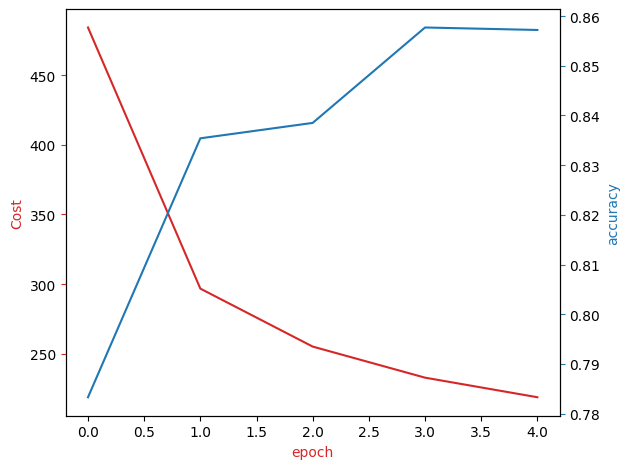

In [19]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()